<a href="https://colab.research.google.com/github/geniusnhu/DNN-Improvement/blob/master/Improve_DNN_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import time

# Classification task with Fashion MNIST dataset

In [0]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

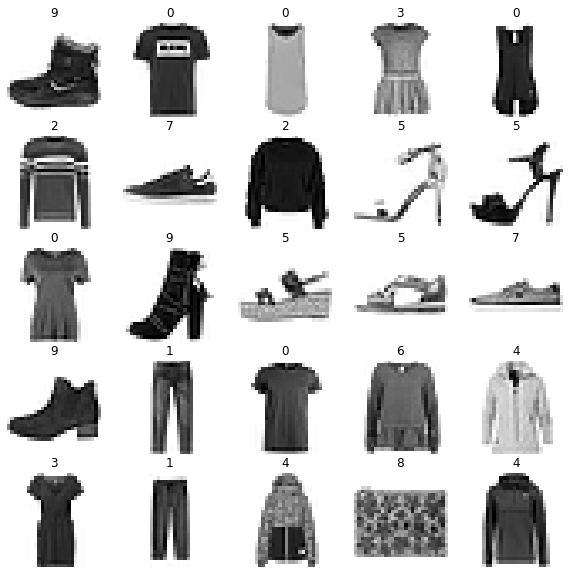

In [0]:
plt.figure(figsize=(10, 10))
for row in range(5):
  for col in range(5):
    index = 5 * row + col
    plt.subplot(5, 5, index + 1)
    plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(y_train_full[index], fontsize=12)
plt.show()

## Apply initialization

**Problem:** Train a classsifcation model with different initialization and measure its performane and running time.

In [15]:
# Zero Initialization
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.Dense(n_layers, activation='relu',kernel_initializer='zeros', bias_initializer='zeros'))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.SGD(lr=1e-3),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.0925
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.0925
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.0925
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.0925
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.0925
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.0925
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy:

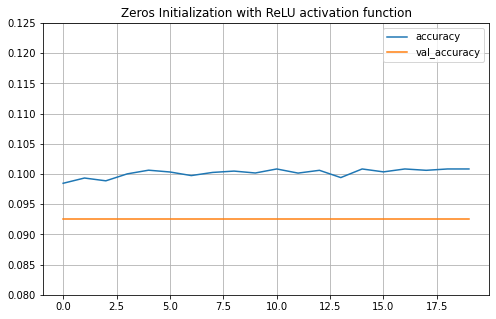

In [22]:
pd.DataFrame(history.history).iloc[:,[1,3]].plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.08, 0.125)
plt.title('Zeros Initialization with ReLU activation function')
plt.show()

In [23]:
# Ones Initialization
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.Dense(n_layers, activation='relu',kernel_initializer='ones', bias_initializer='ones'))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.SGD(lr=1e-3),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
1688/1688 [==============================] - 3s 2ms/step - loss: 28044412.0000 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.0925
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.0925
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.0925
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.0925
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.0925
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.0925
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3027 - val_ac

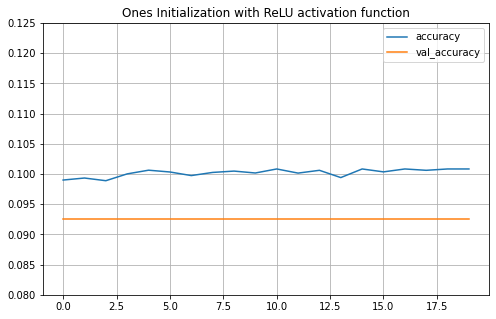

In [25]:
pd.DataFrame(history.history).iloc[:,[1,3]].plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.08, 0.125)
plt.title('Ones Initialization with ReLU activation function')
plt.show()

In [12]:
# Try with default value without activation function
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.Dense(n_layers))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.SGD(lr=1e-3),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.9600 - accuracy: 0.6732 - val_loss: 0.6800 - val_accuracy: 0.7630
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6316 - accuracy: 0.7793 - val_loss: 0.5818 - val_accuracy: 0.7937
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5644 - accuracy: 0.8021 - val_loss: 0.5377 - val_accuracy: 0.8093
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5284 - accuracy: 0.8139 - val_loss: 0.5154 - val_accuracy: 0.8155
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5058 - accuracy: 0.8220 - val_loss: 0.4915 - val_accuracy: 0.8232
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4892 - accuracy: 0.8274 - val_loss: 0.4779 - val_accuracy: 0.8285
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4773 - accuracy: 0.8307 - val_loss: 0.4683 - val_accuracy:

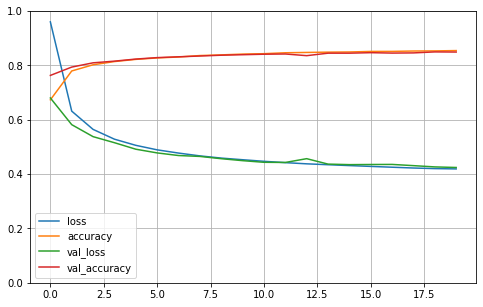

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Default value (Glorot) without activation function')
plt.show()

In [0]:
# Try with default value
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.Dense(n_layers, activation ='relu'))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.SGD(lr=1e-3),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 1.9231 - accuracy: 0.3496 - val_loss: 1.4457 - val_accuracy: 0.5502
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 1.1028 - accuracy: 0.6481 - val_loss: 0.8583 - val_accuracy: 0.7220
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7838 - accuracy: 0.7289 - val_loss: 0.7118 - val_accuracy: 0.7373
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6772 - accuracy: 0.7588 - val_loss: 0.6423 - val_accuracy: 0.7728
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6184 - accuracy: 0.7789 - val_loss: 0.5866 - val_accuracy: 0.7867
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5805 - accuracy: 0.7921 - val_loss: 0.5568 - val_accuracy: 0.8062
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5535 - accuracy: 0.8019 - val_loss: 0.5344 - val_accuracy:

In [0]:
# ReLU goes with he initialization, let's see of this improve the model performance nd running time
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.Dense(n_layers, activation ='relu', kernel_initializer="he_normal"))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.SGD(lr=1e-3),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 1.7039 - accuracy: 0.4326 - val_loss: 1.0764 - val_accuracy: 0.6665
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.8365 - accuracy: 0.7089 - val_loss: 0.6898 - val_accuracy: 0.7625
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6503 - accuracy: 0.7769 - val_loss: 0.5991 - val_accuracy: 0.7937
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5770 - accuracy: 0.8010 - val_loss: 0.5531 - val_accuracy: 0.8080
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5362 - accuracy: 0.8133 - val_loss: 0.5147 - val_accuracy: 0.8193
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5091 - accuracy: 0.8217 - val_loss: 0.4960 - val_accuracy: 0.8275
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4896 - accuracy: 0.8287 - val_loss: 0.4846 - val_accuracy:

In [0]:
# Set He initialization with a uniform distribution but based on fan_avg rather than fan_in
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.Dense(n_layers, activation ='relu', kernel_initializer=init))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.SGD(lr=1e-3),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 1.2762 - accuracy: 0.5799 - val_loss: 0.7606 - val_accuracy: 0.7498
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6730 - accuracy: 0.7676 - val_loss: 0.6067 - val_accuracy: 0.7878
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5791 - accuracy: 0.7967 - val_loss: 0.5559 - val_accuracy: 0.8002
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5337 - accuracy: 0.8120 - val_loss: 0.5208 - val_accuracy: 0.8183
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5050 - accuracy: 0.8215 - val_loss: 0.4909 - val_accuracy: 0.8243
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4838 - accuracy: 0.8284 - val_loss: 0.4727 - val_accuracy: 0.8362
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4673 - accuracy: 0.8352 - val_loss: 0.4609 - val_accuracy:

## Activation function

In [0]:
#  RReLU
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.Dense(n_layers, kernel_initializer="he_normal"))
  model_default.add(keras.layers.PReLU(alpha_initializer="zeros",alpha_regularizer=None,
                                       alpha_constraint=None,shared_axes=None))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.SGD(lr=1e-3),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
1688/1688 [==============================] - 6s 4ms/step - loss: 1.6958 - accuracy: 0.4369 - val_loss: 1.0608 - val_accuracy: 0.6668
Epoch 2/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.8299 - accuracy: 0.7098 - val_loss: 0.6885 - val_accuracy: 0.7645
Epoch 3/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.6509 - accuracy: 0.7764 - val_loss: 0.5983 - val_accuracy: 0.7950
Epoch 4/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5760 - accuracy: 0.8025 - val_loss: 0.5508 - val_accuracy: 0.8117
Epoch 5/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5345 - accuracy: 0.8145 - val_loss: 0.5138 - val_accuracy: 0.8235
Epoch 6/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5071 - accuracy: 0.8232 - val_loss: 0.4936 - val_accuracy: 0.8315
Epoch 7/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4875 - accuracy: 0.8300 - val_loss: 0.4838 - val_accuracy:

In [0]:
# LeakyReLU
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.Dense(n_layers, kernel_initializer="he_normal"))
  model_default.add(keras.layers.LeakyReLU(alpha=0.01))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.SGD(lr=1e-3),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 1.6931 - accuracy: 0.4341 - val_loss: 1.0629 - val_accuracy: 0.6653
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.8303 - accuracy: 0.7106 - val_loss: 0.6877 - val_accuracy: 0.7655
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6479 - accuracy: 0.7780 - val_loss: 0.5966 - val_accuracy: 0.7965
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5753 - accuracy: 0.8012 - val_loss: 0.5504 - val_accuracy: 0.8093
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5351 - accuracy: 0.8138 - val_loss: 0.5136 - val_accuracy: 0.8208
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5080 - accuracy: 0.8216 - val_loss: 0.4949 - val_accuracy: 0.8297
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4882 - accuracy: 0.8288 - val_loss: 0.4839 - val_accuracy:

In [0]:
#SELU
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.Dense(n_layers,  kernel_initializer='lecun_normal',activation='selu'))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.SGD(lr=1e-3),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.8591 - accuracy: 0.7144 - val_loss: 0.6219 - val_accuracy: 0.7852
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5717 - accuracy: 0.8003 - val_loss: 0.5304 - val_accuracy: 0.8087
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5088 - accuracy: 0.8207 - val_loss: 0.4963 - val_accuracy: 0.8215
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4758 - accuracy: 0.8322 - val_loss: 0.4721 - val_accuracy: 0.8280
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4545 - accuracy: 0.8384 - val_loss: 0.4508 - val_accuracy: 0.8340
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4385 - accuracy: 0.8447 - val_loss: 0.4370 - val_accuracy: 0.8425
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4258 - accuracy: 0.8489 - val_loss: 0.4269 - val_accuracy:

## Batch normalization

In [0]:
# Try with default value
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.BatchNormalization())
  model_default.add(keras.layers.Dense(n_layers, activation ='relu', kernel_initializer="he_normal"))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.SGD(lr=1e-3),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
1688/1688 [==============================] - 8s 5ms/step - loss: 1.3517 - accuracy: 0.5767 - val_loss: 0.8073 - val_accuracy: 0.7545
Epoch 2/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.7819 - accuracy: 0.7503 - val_loss: 0.6150 - val_accuracy: 0.7942
Epoch 3/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.6526 - accuracy: 0.7801 - val_loss: 0.5384 - val_accuracy: 0.8128
Epoch 4/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5912 - accuracy: 0.7964 - val_loss: 0.4959 - val_accuracy: 0.8250
Epoch 5/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5520 - accuracy: 0.8065 - val_loss: 0.4674 - val_accuracy: 0.8303
Epoch 6/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5246 - accuracy: 0.8168 - val_loss: 0.4472 - val_accuracy: 0.8378
Epoch 7/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5046 - accuracy: 0.8230 - val_loss: 0.4330 - val_accuracy:

# Regression task

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## Initialization

In [69]:
# Try with default value without activation function
tf.random.set_seed(42)
np.random.seed(42)

model_default = keras.models.Sequential()
#model_default.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
for n_layers in (100, 50, 10, 10, 10):
  model_default.add(keras.layers.Dense(n_layers, activation="relu", input_shape=X_train.shape[1:]))
model_default.add(keras.layers.Dense(1))
    
model_default.compile(loss="mean_squared_error",
                      optimizer=keras.optimizers.SGD(lr=1e-3))

start_time = time.time()
history = model_default.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.3043 - val_loss: 1.5184
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8530 - val_loss: 0.9171
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6384 - val_loss: 0.6814
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5590 - val_loss: 0.5781
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5041 - val_loss: 0.4965
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4616 - val_loss: 0.4473
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4322 - val_loss: 0.4165
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4121 - val_loss: 0.3990
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3985 - val_loss: 0.3899
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3889 - val_loss: 0.3870

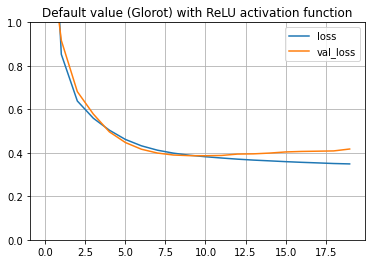

In [70]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Default value (Glorot) with ReLU activation function')
plt.show()

In [71]:
# He_Normal Initialization with ReLU activation function
tf.random.set_seed(42)
np.random.seed(42)

model_default = keras.models.Sequential()
for n_layers in (100, 50, 10, 10, 10):
  model_default.add(keras.layers.Dense(n_layers, activation="relu", input_shape=X_train.shape[1:], 
                                       kernel_initializer="he_normal"))
model_default.add(keras.layers.Dense(1))
    
model_default.compile(loss="mean_squared_error",
                      optimizer=keras.optimizers.SGD(lr=1e-3))

start_time = time.time()
history = model_default.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0828 - val_loss: 1.1610
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6848 - val_loss: 0.6265
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5257 - val_loss: 0.5508
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4762 - val_loss: 0.5006
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4463 - val_loss: 0.4633
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4243 - val_loss: 0.4480
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4104 - val_loss: 0.4246
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3998 - val_loss: 0.4147
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3899 - val_loss: 0.4028
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3832 - val_loss: 0.3895

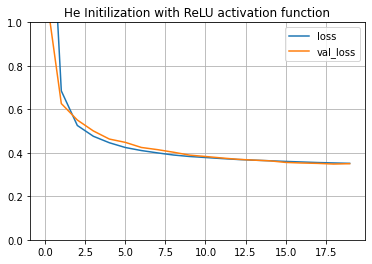

In [73]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('He Initilization with ReLU activation function')
plt.show()

In [74]:
# Glorot_normal Initialization with ReLU activation function
tf.random.set_seed(42)
np.random.seed(42)

model_default = keras.models.Sequential()
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
for n_layers in (100, 50, 10, 10, 10):
  model_default.add(keras.layers.Dense(n_layers, activation="relu", input_shape=X_train.shape[1:], 
                                       kernel_initializer=init))
model_default.add(keras.layers.Dense(1))
    
model_default.compile(loss="mean_squared_error",
                      optimizer=keras.optimizers.SGD(lr=1e-3))

start_time = time.time()
history = model_default.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.0796 - val_loss: 0.7084
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5789 - val_loss: 0.5329
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5000 - val_loss: 0.4797
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4644 - val_loss: 0.4548
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4417 - val_loss: 0.4354
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4250 - val_loss: 0.4207
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4131 - val_loss: 0.4099
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4042 - val_loss: 0.4038
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3969 - val_loss: 0.3966
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3910 - val_loss: 0.3927

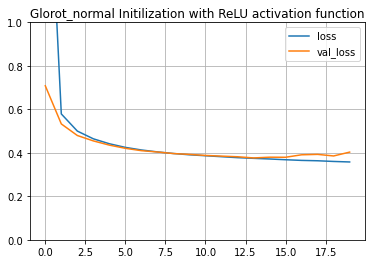

In [75]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Glorot_normal Initilization with ReLU activation function')
plt.show()

## Activation function

In [76]:
# He Initialization with Randomized ReLU activation function
tf.random.set_seed(42)
np.random.seed(42)

model_default = keras.models.Sequential()
for n_layers in (100, 50, 10, 10, 10):
  model_default.add(keras.layers.Dense(n_layers, activation="relu", input_shape=X_train.shape[1:], kernel_initializer='he_normal'))
  model_default.add(keras.layers.PReLU(alpha_initializer="zeros",alpha_regularizer=None,
                                       alpha_constraint=None,shared_axes=None))
model_default.add(keras.layers.Dense(1))
    
model_default.compile(loss="mean_squared_error",
                      optimizer=keras.optimizers.SGD(lr=1e-3))

start_time = time.time()
history = model_default.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0828 - val_loss: 1.1610
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6848 - val_loss: 0.6265
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5257 - val_loss: 0.5508
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4762 - val_loss: 0.5006
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4463 - val_loss: 0.4633
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4243 - val_loss: 0.4480
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4104 - val_loss: 0.4246
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3998 - val_loss: 0.4147
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3899 - val_loss: 0.4028
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3832 - val_loss: 0.3895

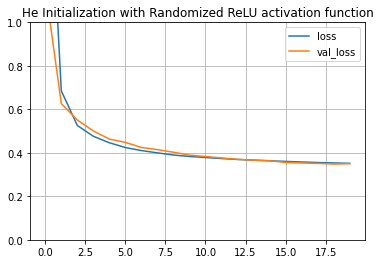

In [77]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('He Initialization with Randomized ReLU activation function')
plt.show()

In [88]:
# He Initialization with Leaky ReLU activation function
tf.random.set_seed(42)
np.random.seed(42)

model_default = keras.models.Sequential()
for n_layers in (100, 50, 10, 10, 10):
  model_default.add(keras.layers.Dense(n_layers, activation="relu", input_shape=X_train.shape[1:], kernel_initializer='he_normal'))
  model_default.add(keras.layers.LeakyReLU(alpha=0.01))
model_default.add(keras.layers.Dense(1))
    
model_default.compile(loss="mean_squared_error",
                      optimizer=keras.optimizers.SGD(lr=1e-3))

start_time = time.time()
history = model_default.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.0828 - val_loss: 1.1610
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6848 - val_loss: 0.6265
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5257 - val_loss: 0.5508
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4762 - val_loss: 0.5006
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4463 - val_loss: 0.4633
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4243 - val_loss: 0.4480
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4104 - val_loss: 0.4246
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3998 - val_loss: 0.4147
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3899 - val_loss: 0.4028
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3832 - val_loss: 0.3895

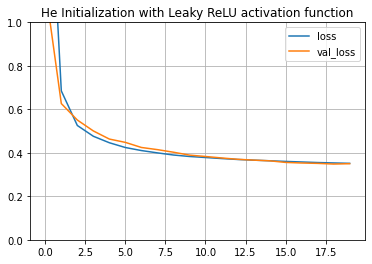

In [89]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('He Initialization with Leaky ReLU activation function')
plt.show()

In [90]:
# LeCun Initialization with SELU activation function
tf.random.set_seed(42)
np.random.seed(42)

model_default = keras.models.Sequential()
for n_layers in (100, 50, 10, 10, 10):
  model_default.add(keras.layers.Dense(n_layers,  kernel_initializer='lecun_normal',activation='selu'))
model_default.add(keras.layers.Dense(1))
    
model_default.compile(loss="mean_squared_error",
                      optimizer=keras.optimizers.SGD(lr=1e-3))

start_time = time.time()
history = model_default.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8913 - val_loss: 0.5297
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4874 - val_loss: 0.4257
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4417 - val_loss: 0.4016
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4202 - val_loss: 0.3937
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4080 - val_loss: 0.3859
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3962 - val_loss: 0.3703
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3887 - val_loss: 0.3716
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3833 - val_loss: 0.3722
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3774 - val_loss: 0.3540
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3731 - val_loss: 0.3554

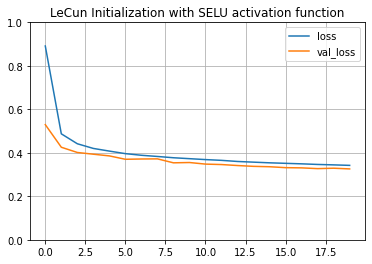

In [91]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('LeCun Initialization with SELU activation function')
plt.show()

## Batch Normalization

In [82]:
# Batch Normalization
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

tf.random.set_seed(42)
np.random.seed(42)

model_default = keras.models.Sequential()
for n_layers in (100, 50, 10, 10, 10):
  model_default.add(keras.layers.BatchNormalization())
  model_default.add(keras.layers.Dense(n_layers,  kernel_initializer='lecun_normal',activation='selu'))
model_default.add(keras.layers.Dense(1))
    
model_default.compile(loss="mean_squared_error",
                      optimizer=keras.optimizers.SGD(lr=1e-3))

start_time = time.time()
history = model_default.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1718 - val_loss: 1.4792
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5318 - val_loss: 0.7240
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4949 - val_loss: 0.7041
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4876 - val_loss: 0.5760
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4722 - val_loss: 0.5236
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4681 - val_loss: 0.6608
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4563 - val_loss: 0.7064
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4544 - val_loss: 0.5404
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4614 - val_loss: 0.6699
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4532 - val_loss: 0.7480

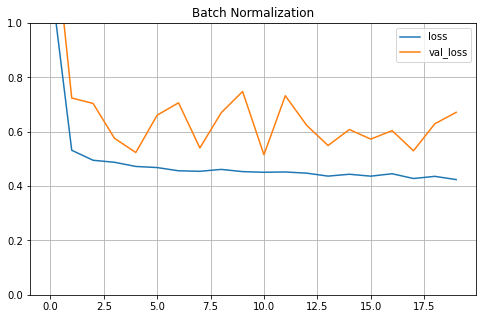

In [83]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Batch Normalization')
plt.show()